<a href="https://colab.research.google.com/github/zntbhctp/KalpHastaliklarinaYakalanmaRiskiTahminProjesi/blob/main/Chapter_6_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

5


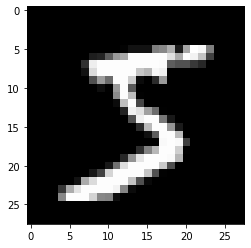

In [ ]:
plt.imshow(X_train[0], "gray")
print(y_train[0])

In [ ]:
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape

(60000, 28, 28, 1)

In [ ]:
inputs = keras.Input(shape = (28,28,1))
conv_layer = layers.Conv2D(4, kernel_size = (3,3), 
                           activation = "relu", padding = "same")(inputs)

flatten = layers.Flatten()(conv_layer)
outputs = layers.Dense(10, activation = "softmax")(flatten)
mdl = keras.Model(inputs, outputs)


mdl.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy")
mdl.fit(X_train, y_train, epochs =  10)

Epoch 1/10
1875/1875 [==============================] - 16s 3ms/step - loss: 0.2656
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1182
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0944
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0824
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0736
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0669
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0600
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0539
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0484
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0432


In [ ]:

new_mdl =  keras.Model(inputs,conv_layer)
Xpred = new_mdl.predict(X_train)


1875/1875 [==============================] - 4s 2ms/step


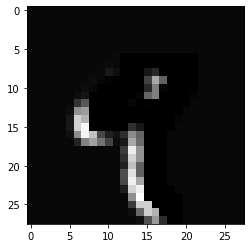

In [ ]:
plt.imshow(Xpred[4,:,:,0], "gray")

In [ ]:
inputs = keras.Input(shape = (28,28,1))
conv1 = layers.Conv2D(128, kernel_size = (3,3), 
                           activation = "relu", padding = "same")(inputs)
pool1 = layers.MaxPool2D(pool_size=(2,2))(conv1)

conv2 = layers.Conv2D(64, kernel_size = (3,3), 
                           activation = "relu", padding = "same")(pool1)
pool2 = layers.MaxPool2D(pool_size=(2,2))(conv2)
flatten = layers.Flatten()(pool2)
dense1 = layers.Dense(128, activation = "relu")(flatten)
dense2 = layers.Dense(64, activation = "relu")(dense1)
outputs = layers.Dense(10, activation = "softmax")(dense2)
mdl = keras.Model(inputs, outputs)


mdl.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy",
            metrics = ["accuracy"])
mdl.fit(X_train, y_train, epochs =  10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.1246 - accuracy: 0.9608
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0429 - accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0211 - accuracy: 0.9930
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0163 - accuracy: 0.9948
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0142 - accuracy: 0.9953
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0112 - accuracy: 0.9965
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0094 - accuracy: 0.9972
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.00

In [ ]:
ypred = mdl.predict(X_test)

313/313 [==============================] - 1s 4ms/step


In [ ]:
mdl.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0374 - accuracy: 0.9915


[0.03743693605065346, 0.9915000200271606]

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
ypred_label = np.argmax(ypred, axis = 1)
ypred_label

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
ix = (y_test !=  ypred_label)

4
9


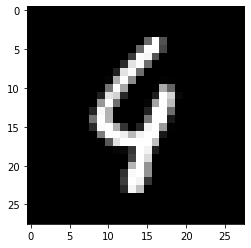

In [ ]:
plt.imshow(X_test[ix][0], "gray")
print(y_test[ix][0])
print(ypred_label[ix][0])

<BarContainer object of 10 artists>

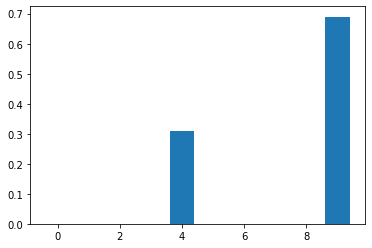

In [ ]:
plt.bar(np.arange(10), ypred[ix][0])

In [ ]:
mdl1 = keras.Model(inputs, conv1)

Xpred = mdl1.predict(X_test)

313/313 [==============================] - 1s 2ms/step


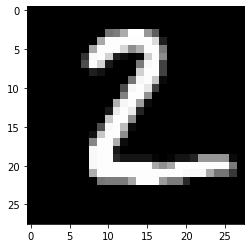

In [ ]:
plt.imshow(X_test[1], "gray")

In [ ]:
Xpred.shape

(10000, 28, 28, 128)

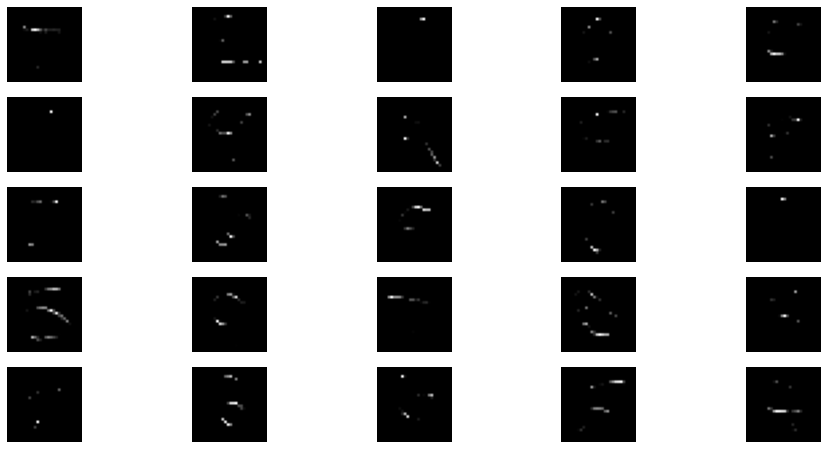

In [ ]:
plt.figure(figsize =  (16,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(Xpred[i,:,:,5],"gray")
    plt.axis("off")

In [ ]:
mdl2 = keras.Model(inputs, conv2)

Xpred = mdl2.predict(X_test)

313/313 [==============================] - 1s 2ms/step


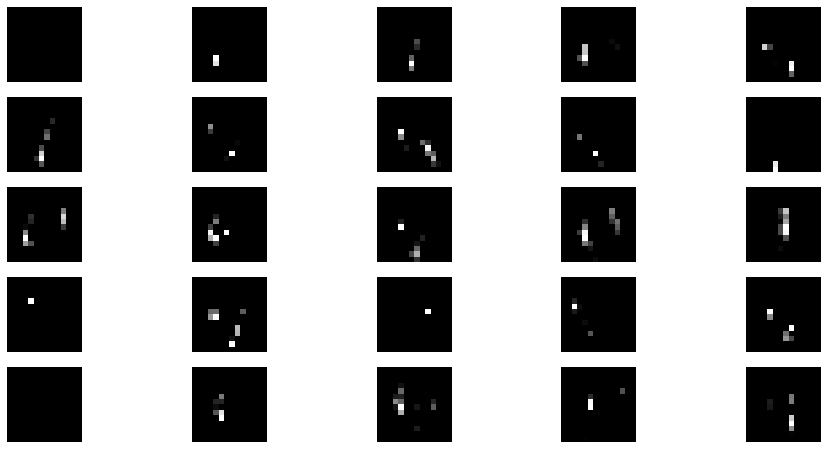

In [ ]:
plt.figure(figsize =  (16,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(Xpred[i,:,:,55],"gray")
    plt.axis("off")

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

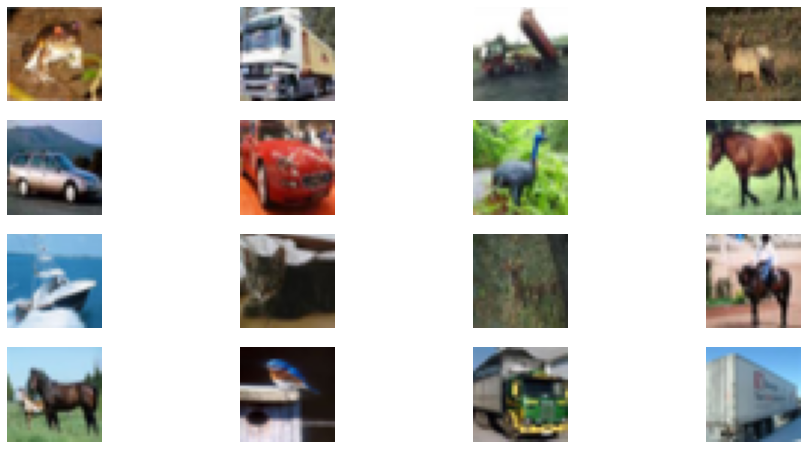

In [ ]:
plt.figure(figsize =  (16,8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i])
    plt.axis("off")

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)